# RFM Customer Segmentation and CLV

As per <a href = "https://clevertap.com/blog/rfm-analysis/">blog</a>, <br>
* RFM stands for recency, frequency and monetary value corresponding to a customer trait. <br>
* They indicate customers' behaviour in pruchases which can be utilized for business decisions. <br>
* Frequency and monetary value affects customer's life time value (CLV) and recency affects retention rate. 


### About the data 

The data is obtained from <a href = "https://www.kaggle.com/datasets/carrie1/ecommerce-data">kaggle.<a>
* InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
* StockCode: Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name.
* Quantity: The quantities of each product (item) per transaction. 
* InvoiceDate: Inovice date and time. The day and time when a transaction was generated 
* UnitPrice: Product price per unit in sterling 
* CustomerID: A 5-digit integral number uniquely assigned to each customer. 
* Country: The name of the country where a customer resides.

### Data Preparation

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
df = pd.read_csv('retail_data.csv', encoding="ISO-8859-1")

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [28]:
def visualization():
    print(df.shape)
    print('------------------------------------------------------------')
    print(df.info())         
    print('------------------------------------------------------------')
    print(df.iloc[0])
    print('------------------------------------------------------------')

visualization()

(541909, 8)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
------------------------------------------------------------
InvoiceNo                                  536365
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        6
InvoiceDate                        12/1/2010 8:26
UnitPric

In [30]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [2]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [3]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [39]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [40]:
df[df['Quantity'] < 0] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


* Negative Quantities indicates returned items 

In [3]:
# Removing returned products (Invoice numbers starting with C) from the data set
df = df[~df["InvoiceNo"].str.contains("C", na = False)]

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) 
df['date'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'])

## Ranking and KMeans

The are 2 methods used here  for RFM customer segmentation. 
* Ranking method: Here ranks are assigned for RFM values and then the data is segmented based on combined rank values. 
* KMeans method: KMeans clustering method is used for segmentation. 

### Recency

In [5]:
max_date = df['date'].max()
max_date

Timestamp('2011-12-09 00:00:00')

In [6]:
# Customer Recency
customer_recency = df.groupby('CustomerID').agg(last_date=('date','max')).reset_index()
customer_recency['recency'] = max_date - customer_recency['last_date']
customer_recency['recency'] = customer_recency['recency'].astype('string').str.replace('days','').astype(int)

In [11]:
customer_recency.head()

,CustomerID,last_date,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


### Frequency

In [7]:
freq = df.groupby('CustomerID').date.count().reset_index()
freq.columns = ['CustomerID', 'frequency'] 
freq.head()

,CustomerID,frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### Monetary Value

In [17]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01


In [8]:
### Revenue Column 
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [20]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00


In [9]:
monet1 = df.groupby(['CustomerID', 'InvoiceNo']).agg(revenue = ('Revenue', 'sum')).reset_index()
monet2 = monet1.groupby('CustomerID').agg(monetary=('revenue','mean')).reset_index()
monet2.head()

,CustomerID,monetary
0,12346.0,77183.600000
1,12347.0,615.714286
2,12348.0,449.310000
3,12349.0,1757.550000
4,12350.0,334.400000


In [10]:
customer_recency['recency_rank'] = customer_recency['recency'].rank(pct=True)
freq['frequeny_rank'] = freq['frequency'].rank(ascending=False, pct=True) 
monet2['monetary_rank'] = monet2['monetary'].rank(ascending=False, pct=True) 

In [24]:
customer_recency.head(3)

,CustomerID,last_date,recency,recency_rank
0,12346.0,2011-01-18,325,0.962779
1,12347.0,2011-12-07,2,0.042291
2,12348.0,2011-09-25,75,0.620880


In [25]:
freq.head(3)

,CustomerID,frequency,frequeny_rank
0,12346.0,1,0.991818
1,12347.0,182,0.119152
2,12348.0,31,0.579050


In [11]:
monet2.head(3)

,CustomerID,monetary,monetary_rank
0,12346.0,77183.600000,0.000461
1,12347.0,615.714286,0.119152
2,12348.0,449.310000,0.229085


In [12]:
all_data = pd.merge(customer_recency, freq, how='left', on='CustomerID') 
all_data = pd.merge(all_data, monet2, how='left', on='CustomerID')

In [30]:
all_data.head(3)

,CustomerID,last_date,recency,recency_rank,frequency,frequeny_rank,monetary,monetary_rank
0,12346.0,2011-01-18,325,0.962779,1,0.991818,77183.600000,0.000461
1,12347.0,2011-12-07,2,0.042291,182,0.119152,615.714286,0.119152
2,12348.0,2011-09-25,75,0.620880,31,0.579050,449.310000,0.229085


In [13]:
bins = [0, 0.5, 1]
names = ['1','2']

In [14]:
final = pd.DataFrame(customer_recency['CustomerID'])  
final['frequency'] = pd.cut(freq['frequeny_rank'], bins, labels=names).astype('string')
final['recency'] = pd.cut(customer_recency['recency_rank'], bins, labels=names).astype('string')
final['monetary'] = pd.cut(monet2['monetary_rank'], bins, labels=names).astype('string')
final['rec_freq_mone'] = final['recency'] + final['frequency'] + final['monetary']
all_data['recency_frequency_monetary'] = final['rec_freq_mone']

In [33]:
all_data.head(3)

,CustomerID,last_date,recency,recency_rank,frequency,frequeny_rank,monetary,monetary_rank,recency_frequency_monetary
0,12346.0,2011-01-18,325,0.962779,1,0.991818,77183.600000,0.000461,221
1,12347.0,2011-12-07,2,0.042291,182,0.119152,615.714286,0.119152,111
2,12348.0,2011-09-25,75,0.620880,31,0.579050,449.310000,0.229085,221


### Segments 

We create segments based on RFM values and bins. 

In [27]:
# Mapping of Segments 
seg_map = {
    
    r'111':'Core', 
    r'112':'Loyal',
    r'211':'To be Retained',
    r'122':'New Customers', 
    r'212':'At Risk',
    r'221':'Luxury',
    r'222':'Challenge',
    r'121':'Personalized'
    
} 

all_data['Segment'] = all_data['recency_frequency_monetary'].replace(seg_map, regex=True)

In [28]:
all_data.head(3)

,CustomerID,last_date,recency,recency_rank,frequency,frequeny_rank,monetary,monetary_rank,recency_frequency_monetary,Segment,cluster
0,12346.0,2011-01-18,325,0.962779,1,0.991818,77183.600000,0.000461,221,Luxury,1
1,12347.0,2011-12-07,2,0.042291,182,0.119152,615.714286,0.119152,111,Core,0
2,12348.0,2011-09-25,75,0.620880,31,0.579050,449.310000,0.229085,221,Luxury,0


[Text(0, 0, 'Luxury'),
 Text(1, 0, 'Core'),
 Text(2, 0, 'Challenge'),
 Text(3, 0, 'To be Retained'),
 Text(4, 0, 'Personalized'),
 Text(5, 0, 'New Customers'),
 Text(6, 0, 'Loyal'),
 Text(7, 0, 'At Risk')]

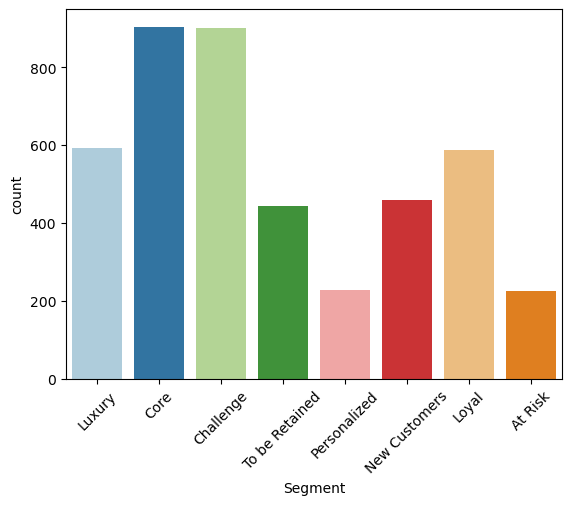

In [29]:
sns.color_palette("Set2")
fig = sns.countplot(x='Segment', data=all_data, palette = "Paired");
sns.color_palette("Set2")
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

* There are more challenging customers. 
* There are customers who are risk of loosing. 
* Different customer segment requires different personalized advertising tactics and offers to increase customer retention and sales. 

### KMeans Algorithm

In [18]:
from sklearn.cluster import KMeans

Initially we asssume for 3 clusters later finf optimal number of cluster using elbow method. 

In [19]:
X= all_data[['frequency','monetary','recency']]
km= KMeans(n_clusters=3,n_init= 10,max_iter=300,tol=0.0001)
fitting= km.fit_predict(X)
X['centroids']=fitting

C:\Users\pooja\AppData\Local\Temp\ipykernel_14152\1389698379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['centroids']=fitting


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


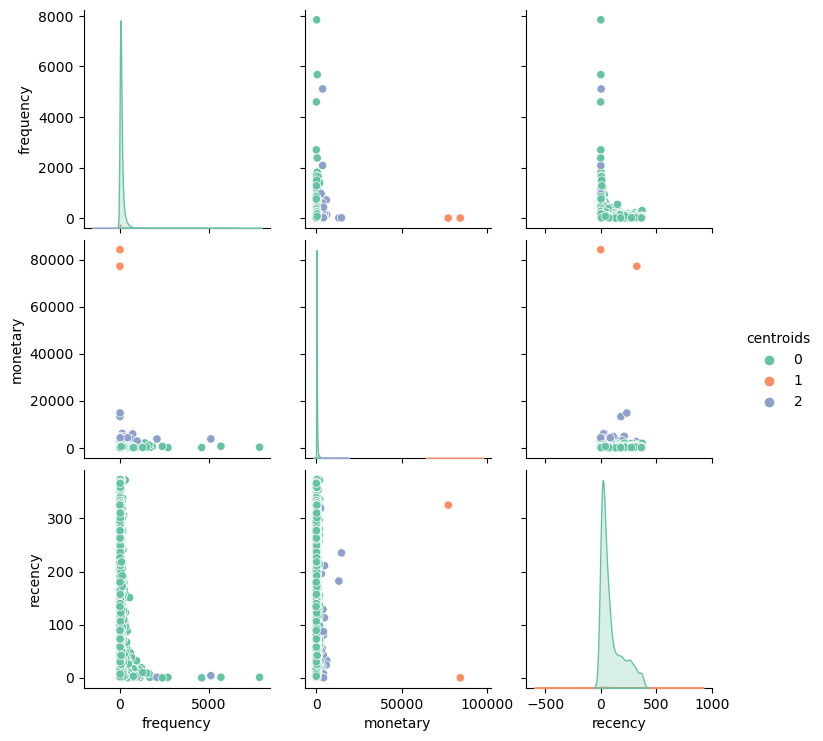

In [20]:
sns.pairplot(data=X,hue='centroids',palette = "Set2")

* Low monetary, high recency are grouped for cluster 0
* High momnetary is categorized in cluster 2. 

In [21]:
sse= []

for k in range(1,11):
    kmeans= KMeans(n_clusters=k,n_init= 10,max_iter=300,tol=0.0001)
    a= kmeans.fit(X)
    sse.append(a.inertia_)

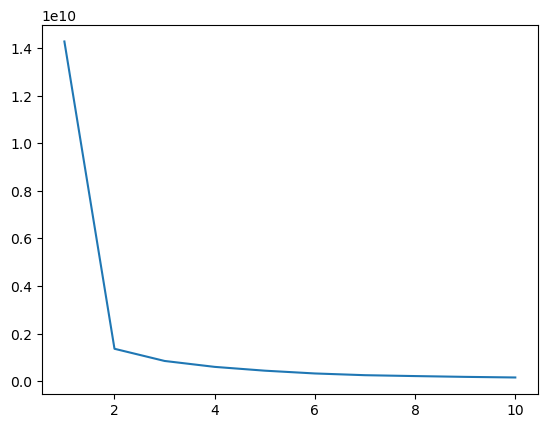

In [22]:
plt.plot(range(1,11),sse)

In [23]:
# # 3 Clusters  
km.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
all_data['cluster'] = km.labels_

In [30]:
all_data.head(3)

,CustomerID,last_date,recency,recency_rank,frequency,frequeny_rank,monetary,monetary_rank,recency_frequency_monetary,Segment,cluster
0,12346.0,2011-01-18,325,0.962779,1,0.991818,77183.600000,0.000461,221,Luxury,1
1,12347.0,2011-12-07,2,0.042291,182,0.119152,615.714286,0.119152,111,Core,0
2,12348.0,2011-09-25,75,0.620880,31,0.579050,449.310000,0.229085,221,Luxury,0


### Features of Clusters

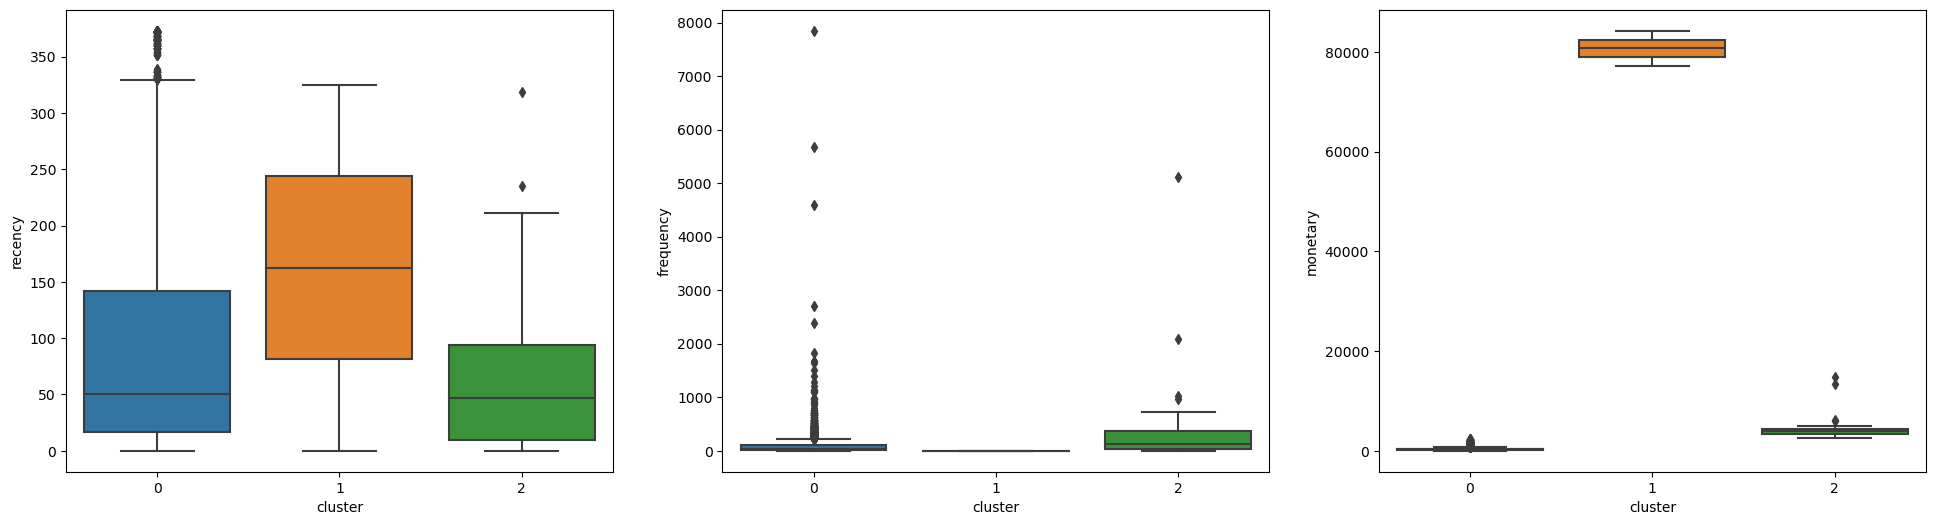

In [31]:
fig, axes = plt.subplots(1,3 , figsize=(24,6))
axes = axes.flatten()
features = ['recency','frequency','monetary']
for i in range(len(features)):
    sns.boxplot(x ='cluster', y = features[i], data=all_data, ax=axes[i] )

* Cluster 1 is categorized by more recency, less frequency and high monetory. 
* Cluster 2 has lower recency, higher frequency. 
* Cluster 0 has lower to medium recency, slightly more frequency. 

## Customer Lifetime Value

* Customer life time value is a measurement of how valuable a customer is to the company, not just on a purchase-by-purchase basis but across entire customer relationships.
* ustomer lifetime value is the total worth to a business of a customer over the whole period of their relationship with the brand. 
* It is more costly to acquire new prospects than to retain existing ones. 
<br>
reference: <a href= "https://www.qualtrics.com/au/experience-management/customer/customer-lifetime-value/">qualtrics</a>

In [34]:
bins = [0, 0.35, 0.75, 1]
names = ['3','2', '1'] 

final_clv = pd.DataFrame(customer_recency['CustomerID'])  
final_clv['frequency'] = pd.cut(freq['frequeny_rank'], bins, labels=names).astype('string')
final_clv['recency'] = pd.cut(customer_recency['recency_rank'], bins, labels=names).astype('string')
final_clv['monetary'] = pd.cut(monet2['monetary_rank'], bins, labels=names).astype('string')
final_clv['rec_freq_mone'] = final_clv['recency'].astype('int64') + final_clv['frequency'].astype('int64') + final_clv['monetary'].astype('int64')
all_data['CLV_Overall_Score'] = final_clv['rec_freq_mone']

In [35]:
all_data

,CustomerID,last_date,recency,recency_rank,frequency,frequeny_rank,monetary,monetary_rank,recency_frequency_monetary,Segment,cluster,CLV_RFM,CLV_Overall_Score
0,12346.0,2011-01-18,325,0.962779,1,0.991818,77183.600000,0.000461,221,Luxury,1,113,5
1,12347.0,2011-12-07,2,0.042291,182,0.119152,615.714286,0.119152,111,Core,0,333,9
2,12348.0,2011-09-25,75,0.620880,31,0.579050,449.310000,0.229085,221,Luxury,0,223,7
3,12349.0,2011-11-21,18,0.260544,73,0.334524,1757.550000,0.014750,111,Core,0,333,9
4,12350.0,2011-02-02,310,0.947799,17,0.750979,334.400000,0.403088,221,Luxury,0,112,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2011-03-07,277,0.918414,10,0.856764,180.600000,0.744872,222,Challenge,0,112,4
4335,18281.0,2011-06-12,180,0.802028,7,0.906430,80.820000,0.961051,222,Challenge,0,111,3
4336,18282.0,2011-12-02,7,0.115349,12,0.823001,89.025000,0.953676,122,New Customers,0,311,5
4337,18283.0,2011-12-06,3,0.063494,756,0.006914,130.930000,0.873934,112,Loyal,0,331,7


### Life Time Value

In [36]:
### getting life time value
ltv= df.groupby('CustomerID')['Revenue'].sum().reset_index()
ltv.columns=['CustomerID','ltv']

<Axes: ylabel='Frequency'>

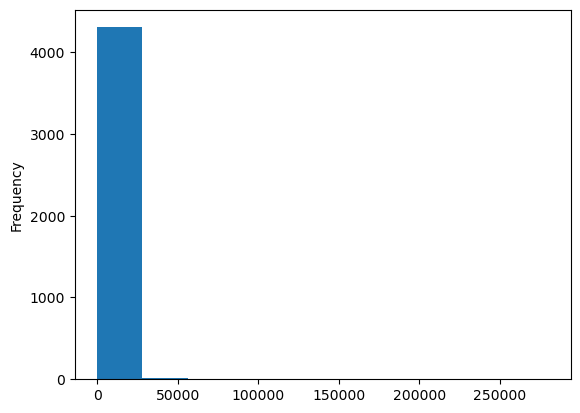

In [37]:
ltv.ltv.plot(kind='hist')

<Axes: ylabel='ltv'>

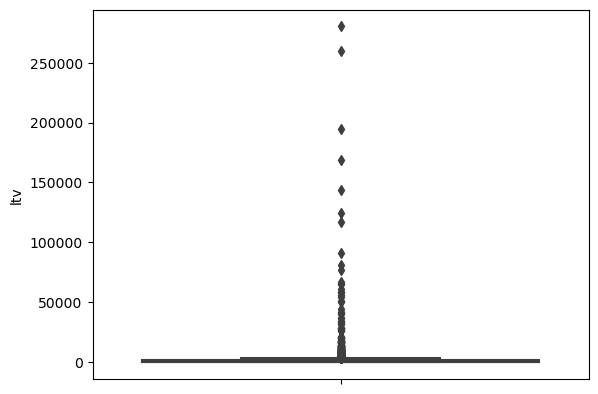

In [38]:
sns.boxplot(y='ltv',data=ltv)

* As there are many outliers boxplot is shrinked. 
###### Remove outlier

In [39]:
outliers_removed= ltv[ltv.ltv <= ltv.ltv.quantile(0.99)]
len(ltv)-len(outliers_removed)

44

<Axes: ylabel='ltv'>

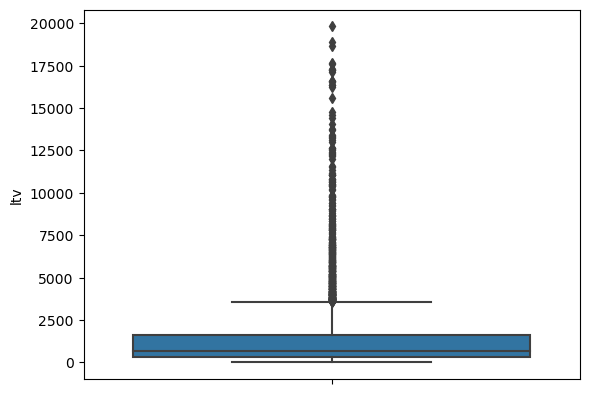

In [40]:
sns.boxplot(y='ltv',data=outliers_removed)

### Modelling

In [41]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3,n_init=10,max_iter=300)
fitting= km.fit_predict(outliers_removed[['ltv']])
outliers_removed['clusters']=fitting

C:\Users\pooja\AppData\Local\Temp\ipykernel_14152\1853511650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['clusters']=fitting


In [42]:
outliers_removed

,CustomerID,ltv,clusters
1,12347.0,4310.00,1
2,12348.0,1797.24,0
3,12349.0,1757.55,0
4,12350.0,334.40,0
5,12352.0,2506.04,1
...,...,...,...
4334,18280.0,180.60,0
4335,18281.0,80.82,0
4336,18282.0,178.05,0
4337,18283.0,2094.88,0


In [43]:
outliers_removed.groupby('clusters')['ltv'].mean()

clusters
0      689.389981
1     3854.752513
2    11427.182941
Name: ltv, dtype: float64

In [44]:
outliers_removed['clusters']=outliers_removed['clusters'].astype('string')

C:\Users\pooja\AppData\Local\Temp\ipykernel_14152\630351260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['clusters']=outliers_removed['clusters'].astype('string')


In [45]:
ltv_mapping= {'0':'Low_ltv','1': 'Mid_ltv','2':'High_ltv'}

In [46]:
outliers_removed['clusters']=outliers_removed['clusters'].map(ltv_mapping)

C:\Users\pooja\AppData\Local\Temp\ipykernel_14152\1897572708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['clusters']=outliers_removed['clusters'].map(ltv_mapping)


In [48]:
outliers_removed

,CustomerID,ltv,clusters
1,12347.0,4310.00,Mid_ltv
2,12348.0,1797.24,Low_ltv
3,12349.0,1757.55,Low_ltv
4,12350.0,334.40,Low_ltv
5,12352.0,2506.04,Mid_ltv
...,...,...,...
4334,18280.0,180.60,Low_ltv
4335,18281.0,80.82,Low_ltv
4336,18282.0,178.05,Low_ltv
4337,18283.0,2094.88,Low_ltv


##### Create dataframe of relevant columns

In [50]:
rr_Data = all_data.loc[:,['CustomerID','recency','frequency','monetary']]

In [64]:
joined_data = pd.merge(outliers_removed[['CustomerID','clusters']],all_data,
                      how='left',on= 'CustomerID')

In [65]:
joined_data

,CustomerID,clusters,last_date,recency,recency_rank,frequency,frequeny_rank,monetary,monetary_rank,recency_frequency_monetary,Segment,cluster,CLV_RFM,CLV_Overall_Score
0,12347.0,Mid_ltv,2011-12-07,2,0.042291,182,0.119152,615.714286,0.119152,111,Core,0,333,9
1,12348.0,Low_ltv,2011-09-25,75,0.620880,31,0.579050,449.310000,0.229085,221,Luxury,0,223,7
2,12349.0,Low_ltv,2011-11-21,18,0.260544,73,0.334524,1757.550000,0.014750,111,Core,0,333,9
3,12350.0,Low_ltv,2011-02-02,310,0.947799,17,0.750979,334.400000,0.403088,221,Luxury,0,112,4
4,12352.0,Mid_ltv,2011-11-03,36,0.423485,85,0.294768,313.255000,0.450565,111,Core,0,232,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4290,18280.0,Low_ltv,2011-03-07,277,0.918414,10,0.856764,180.600000,0.744872,222,Challenge,0,112,4
4291,18281.0,Low_ltv,2011-06-12,180,0.802028,7,0.906430,80.820000,0.961051,222,Challenge,0,111,3
4292,18282.0,Low_ltv,2011-12-02,7,0.115349,12,0.823001,89.025000,0.953676,122,New Customers,0,311,5
4293,18283.0,Low_ltv,2011-12-06,3,0.063494,756,0.006914,130.930000,0.873934,112,Loyal,0,331,7


In [66]:
joined_data.drop(['CustomerID','last_date','recency_rank','frequeny_rank',
                  'monetary_rank',
                  'recency_frequency_monetary','Segment',
                  'cluster'],
                  axis=1, inplace=True) 

joined_data

,clusters,recency,frequency,monetary,CLV_RFM,CLV_Overall_Score
0,Mid_ltv,2,182,615.714286,333,9
1,Low_ltv,75,31,449.310000,223,7
2,Low_ltv,18,73,1757.550000,333,9
3,Low_ltv,310,17,334.400000,112,4
4,Mid_ltv,36,85,313.255000,232,7
...,...,...,...,...,...,...
4290,Low_ltv,277,10,180.600000,112,4
4291,Low_ltv,180,7,80.820000,111,3
4292,Low_ltv,7,12,89.025000,311,5
4293,Low_ltv,3,756,130.930000,331,7


##### Seperate recency, frequency, monetary values for modelling. 

In [71]:
joined_data['recency_groups']= joined_data['CLV_RFM'].str.slice(0,1,1).astype('int64')
joined_data['frequency_groups']= joined_data['CLV_RFM'].str.slice(1,2,1).astype('int64')
joined_data['monetary_groups']= joined_data['CLV_RFM'].str.slice(2,3,1).astype('int64')

In [73]:
joined_data.drop('CLV_RFM',axis=1)
X_1= pd.get_dummies(joined_data.drop('clusters',axis=1))
columns=X_1.columns
X=X_1.values
y= joined_data['clusters'].values 

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [90]:
len(X), len(y), 0.2*4295, 4295-859

(4295, 4295, 859.0, 3436)

In [134]:
columns

Index(['recency', 'frequency', 'monetary', 'CLV_Overall_Score',
       'recency_groups', 'frequency_groups', 'monetary_groups', 'CLV_RFM_111',
       'CLV_RFM_112', 'CLV_RFM_113', 'CLV_RFM_121', 'CLV_RFM_122',
       'CLV_RFM_123', 'CLV_RFM_131', 'CLV_RFM_132', 'CLV_RFM_133',
       'CLV_RFM_211', 'CLV_RFM_212', 'CLV_RFM_213', 'CLV_RFM_221',
       'CLV_RFM_222', 'CLV_RFM_223', 'CLV_RFM_231', 'CLV_RFM_232',
       'CLV_RFM_233', 'CLV_RFM_311', 'CLV_RFM_312', 'CLV_RFM_313',
       'CLV_RFM_321', 'CLV_RFM_322', 'CLV_RFM_323', 'CLV_RFM_331',
       'CLV_RFM_332', 'CLV_RFM_333'],
      dtype='object')

In [93]:
a = [0,1,2,3,4,5]
print(a[:4])

[0, 1, 2, 3]


In [94]:
X, Y, x, y = X[:3436], y[:3436], X[3437:], y[3437:]

In [96]:
model_tree= DecisionTreeClassifier()
cv= RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=1)
scores= cross_val_score(model_tree,X,Y,scoring='accuracy',cv=cv)          

In [97]:
scores.mean()

0.8480772731853004

##### Parametric Search

In [95]:
param_dist = {"max_depth": [3, None],
           "min_samples_leaf": range(1,9),
             "criterion": ["gini", "entropy"]}


tree= DecisionTreeClassifier()
rf= RandomForestClassifier()

tree_cv= RandomizedSearchCV(tree,param_dist,cv=5)
rf_cv= RandomizedSearchCV(rf, param_dist,cv=5)

tree_cv.fit(X,Y) 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': range(1, 9)})

In [98]:
rf_cv.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': range(1, 9)})

In [99]:
tree_cv.best_score_

0.888822314748993

In [109]:
tree_cv.best_params_

{'min_samples_leaf': 7, 'max_depth': 3, 'criterion': 'gini'}

In [100]:
rf_cv.best_score_

0.8914428252259571

In [110]:
rf_cv.best_params_

{'min_samples_leaf': 7, 'max_depth': None, 'criterion': 'gini'}

In [101]:
prediction=rf_cv.predict(x)

In [102]:
comparison_data= pd.DataFrame({'Actual': y,'Prediction':prediction})

In [103]:
comparison_data

,Actual,Prediction
0,Low_ltv,Low_ltv
1,Low_ltv,Low_ltv
2,Low_ltv,Low_ltv
3,Mid_ltv,Mid_ltv
4,Low_ltv,Low_ltv
...,...,...
853,Low_ltv,Low_ltv
854,Low_ltv,Low_ltv
855,Low_ltv,Low_ltv
856,Low_ltv,Low_ltv


In [127]:
comparison_data.groupby(['Actual','Prediction']).size().reset_index()

,Actual,Prediction,0
0,High_ltv,High_ltv,4
1,High_ltv,Low_ltv,2
2,High_ltv,Mid_ltv,9
3,Low_ltv,Low_ltv,706
4,Low_ltv,Mid_ltv,22
5,Mid_ltv,High_ltv,2
6,Mid_ltv,Low_ltv,50
7,Mid_ltv,Mid_ltv,63


In [129]:
(comparison_data['Actual'] == comparison_data['Prediction']).mean()

0.9009324009324009

In [112]:
tree_cv.best_params_

{'min_samples_leaf': 7, 'max_depth': 3, 'criterion': 'gini'}

In [121]:
best_tree= DecisionTreeClassifier(
           max_depth =  3,
           min_samples_leaf = 7,
           criterion = 'gini'

)  

best_tree.fit(X,Y)

bcv= RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=1)
bscores= cross_val_score(best_tree,X,Y,scoring='accuracy',cv=cv)

In [120]:
bscores

array([0.85689354, 0.85502183, 0.82969432, 0.85253054, 0.84803493,
       0.84716157, 0.86474695, 0.85065502, 0.82969432])

### Feature Importance

In [125]:
importance = best_tree.feature_importances_ 

In [130]:
importance

array([0.        , 0.76398556, 0.17153739, 0.06447705, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [135]:
feature_dict = dict(zip(columns, list(importance)))
feature_dict 

{'recency': 0.0,
 'frequency': 0.763985555951124,
 'monetary': 0.17153739347630756,
 'CLV_Overall_Score': 0.06447705057256829,
 'recency_groups': 0.0,
 'frequency_groups': 0.0,
 'monetary_groups': 0.0,
 'CLV_RFM_111': 0.0,
 'CLV_RFM_112': 0.0,
 'CLV_RFM_113': 0.0,
 'CLV_RFM_121': 0.0,
 'CLV_RFM_122': 0.0,
 'CLV_RFM_123': 0.0,
 'CLV_RFM_131': 0.0,
 'CLV_RFM_132': 0.0,
 'CLV_RFM_133': 0.0,
 'CLV_RFM_211': 0.0,
 'CLV_RFM_212': 0.0,
 'CLV_RFM_213': 0.0,
 'CLV_RFM_221': 0.0,
 'CLV_RFM_222': 0.0,
 'CLV_RFM_223': 0.0,
 'CLV_RFM_231': 0.0,
 'CLV_RFM_232': 0.0,
 'CLV_RFM_233': 0.0,
 'CLV_RFM_311': 0.0,
 'CLV_RFM_312': 0.0,
 'CLV_RFM_313': 0.0,
 'CLV_RFM_321': 0.0,
 'CLV_RFM_322': 0.0,
 'CLV_RFM_323': 0.0,
 'CLV_RFM_331': 0.0,
 'CLV_RFM_332': 0.0,
 'CLV_RFM_333': 0.0}

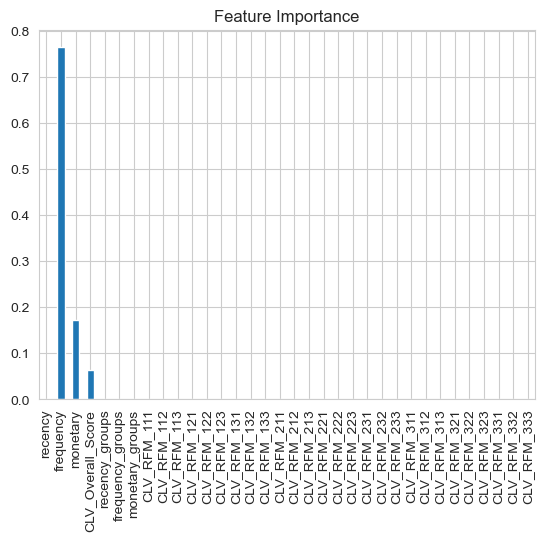

In [136]:
sns.set_style('whitegrid')
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

* Frequency and monetary scores are impacting the cluster more than recency. 

### References 

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
https://www.kaggle.com/code/yugagrawal95/rfm-analysis 
https://www.kaggle.com/code/serkangzel/customer-segmentation-with-rfm-analysis 